In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import cv2
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.utils import plot_model, img_to_array
from tensorflow.keras.models import load_model

from IPython import display
from PIL import Image


In [2]:
high_res_train_images_path = "/kaggle/input/image-super-resolution/dataset/train/high_res"
low_res_train_images_path = "/kaggle/input/image-super-resolution/dataset/train/low_res"

In [3]:
high_res_test_images_path = "/kaggle/input/image-super-resolution/dataset/val/high_res"
low_res_test_images_path = "/kaggle/input/image-super-resolution/dataset/val/low_res"

In [4]:
SIZE = 256

In [5]:
#Function for loading images
def load_images(path, size=224, count=None):
    if count == None:
        files = os.listdir(path)
    else:
        files = os.listdir(path)[:count]
    images = []

    for file in tqdm.tqdm(files):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        img = img.astype("float32") / 255.
        img = img_to_array(img)
        images.append(img)

    images = np.array(images)
    return images

In [6]:
train_low_images = load_images(low_res_train_images_path, size=SIZE)
train_high_images = load_images(high_res_train_images_path, size=SIZE)

100%|██████████| 685/685 [00:12<00:00, 56.45it/s]


In [7]:
#Function for plotting random images from training dataset
def plot_random_images(low_res_images, high_res_images, num_images=5, figsize=(12, 8)):
    fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=figsize)
    
    random_indices = random.sample(range(len(low_res_images)), num_images)
    
    for i, idx in enumerate(random_indices):
        axes[i, 0].imshow(low_res_images[idx])
        axes[i, 0].set_title(f"Low-Res Image {idx}")
        axes[i, 0].axis("off")
        
        axes[i, 1].imshow(high_res_images[idx])
        axes[i, 1].set_title(f"High-Res Image {idx}")
        axes[i, 1].axis("off")
    
    plt.tight_layout()
    plt.show()


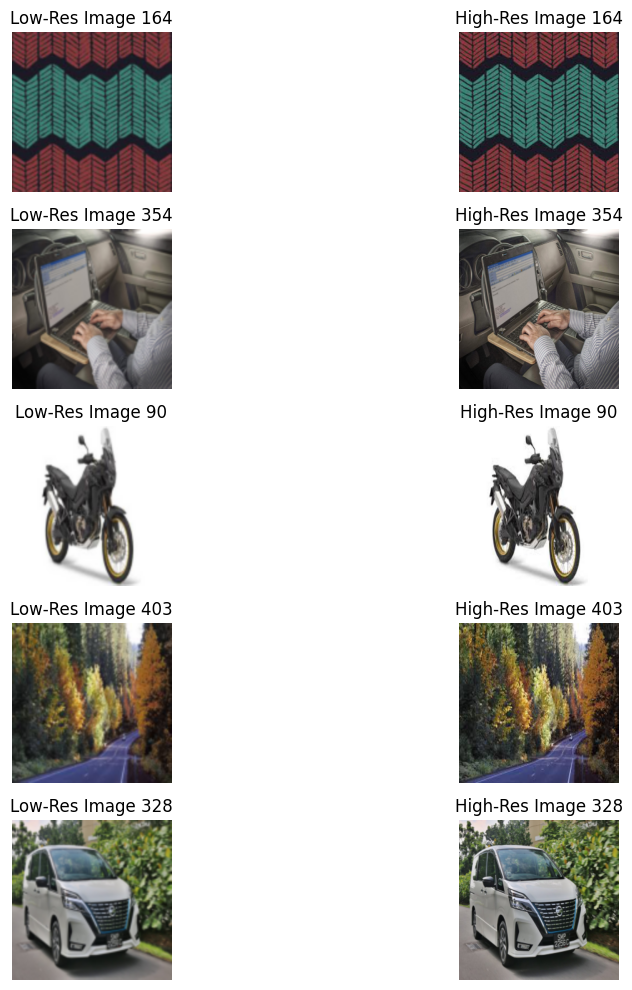

In [8]:
plot_random_images(train_low_images, train_high_images, num_images=5, figsize=(12, 10))

In [9]:
#CNN MODEL
# def down_block(x, filters, kernel_size, apply_batch_normalization=True):
#     x = layers.Conv2D(filters, kernel_size, padding="same", strides=2)(x)
#     if apply_batch_normalization:
#         x = layers.BatchNormalization()(x)

#     x = layers.LeakyReLU()(x)
#     return x
    
# def up_block(x, skip, filters, kernel_size, dropout=False):
#     x = layers.Conv2DTranspose(filters, kernel_size, padding="same", strides=2)(x)
#     if dropout:
#         x = layers.Dropout(0.1)(x)

#     x = layers.LeakyReLU()(x)
#     x = layers.concatenate([x, skip])
#     return x

In [10]:
# def build_model(size):
#     inputs = layers.Input(shape=[size, size, 3])

#     # Downsampling
#     d1 = down_block(inputs, 128, (3, 3), apply_batch_normalization=False)
#     d2 = down_block(d1, 128, (3, 3), apply_batch_normalization=False)
#     d3 = down_block(d2, 256, (3, 3), apply_batch_normalization=True)
#     d4 = down_block(d3, 512, (3, 3), apply_batch_normalization=True)
#     d5 = down_block(d4, 512, (3, 3), apply_batch_normalization=True)

#     # Upsampling
#     u1 = up_block(d5, d4, 512, (3, 3), dropout=False)
#     u2 = up_block(u1, d3, 256, (3, 3), dropout=False)
#     u3 = up_block(u2, d2, 128, (3, 3), dropout=False)
#     u4 = up_block(u3, d1, 128, (3, 3), dropout=False)

#     # Final upsampling
#     u5 = layers.Conv2DTranspose(3, (3, 3), padding='same', strides=2)(u4)
#     u5 = layers.LeakyReLU()(u5)
#     u5 = layers.concatenate([u5, inputs])

#     # Output layer
#     outputs = layers.Conv2D(3, (2, 2), padding='same', strides=1)(u5)
#     return tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
# model = build_model(size=SIZE)

In [12]:
# model.summary()

In [13]:
# model.compile(
#     optimizer = optimizers.Adam(learning_rate=0.001),
#     loss = "mean_absolute_error",
#     metrics = ["accuracy"]
# )

In [14]:
# history = model.fit(
#     train_low_images,
#     train_high_images,
#     epochs = 100,
#     batch_size = 16,
#     validation_data=(test_low_images, test_high_images),
#     verbose = 1
# )

In [15]:
# model.save('/kaggle/working/img_resolution.h5')

In [16]:
trained_model=load_model('/kaggle/input/imgresolution/tensorflow2/default/1/img_resolution.h5')

In [17]:
trained_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 128)  │          3,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 128, 128, 128)  │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 64, 64, 128)    │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 256)    │          1,024 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 32, 32, 256)    │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16, 16, 512)    │          2,048 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 16, 16, 512)    │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 8, 8, 512)      │      2,359,808 │ leaky_re_lu_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 8, 8, 512)      │          2,048 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 8, 8, 512)      │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 512)    │      2,359,808 │ leaky_re_lu_4[0][0]    │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_5 (LeakyReLU) │ (None, 16, 16, 512)    │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1024)   │              0 │ leaky_re_lu_5[0][0],   │
│                           │                        │                │ leaky_re_lu_3[0][0]    │
├──────────────────────

 Total params: 9,602,768 (36.63 MB)

 Trainable params: 9,600,206 (36.62 MB)

 Non-trainable params: 2,560 (10.00 KB)

 Optimizer params: 2 (12.00 B)

In [18]:
test_low_images = load_images(low_res_test_images_path, size=SIZE)
test_high_images = load_images(high_res_test_images_path, size=SIZE)

100%|██████████| 170/170 [00:03<00:00, 54.42it/s]


In [19]:
test_loss, test_accuracy =trained_model.evaluate(test_low_images,test_high_images)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8840 - loss: 0.0195 
Test Loss: 0.01866532489657402
Test Accuracy: 0.8742616772651672


In [20]:
def show_images(test_low, test_high, count=10, size=256):
    for _ in range(count):
        random_idx = np.random.randint(len(test_low))
        predicted = trained_model.predict(test_low[random_idx].reshape(1, size, size, 3), verbose=0)
        predicted = np.clip(predicted, 0.0, 1.0).reshape(size, size, 3)
        
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
        
        axes[0].imshow(test_low[random_idx])
        axes[0].set_title("Low-Resolution Image")
        axes[0].axis("off")
        
        axes[1].imshow(test_high[random_idx])
        axes[1].set_title("Ground Truth")
        axes[1].axis("off")

        axes[2].imshow(predicted)
        axes[2].set_title("Enhanced Image")
        axes[2].axis("off")
        
        plt.show()

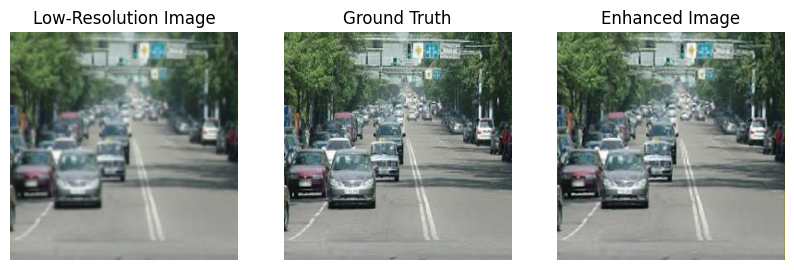

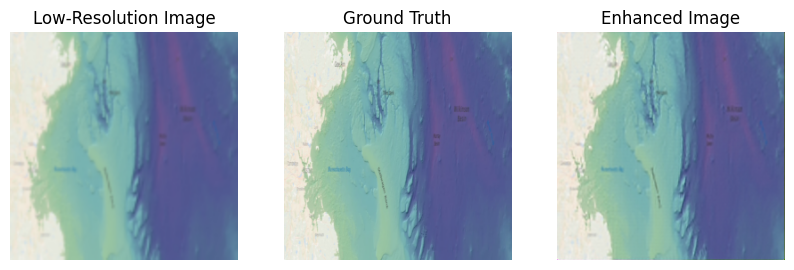

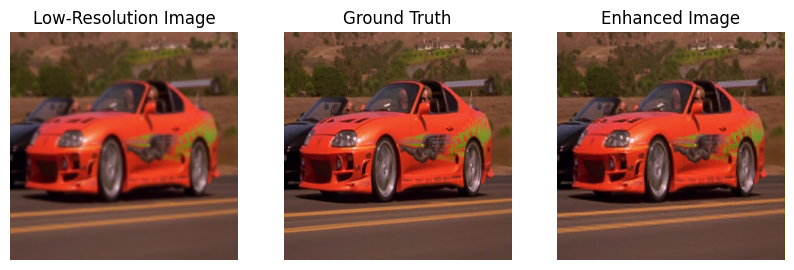

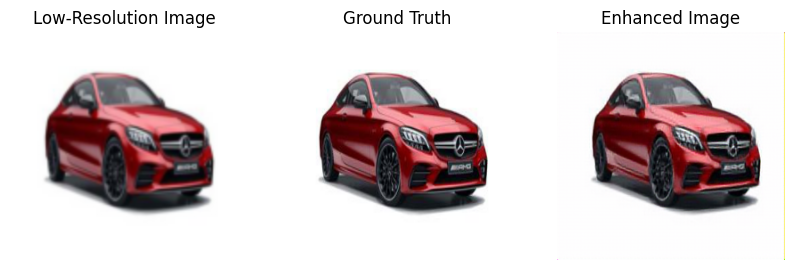

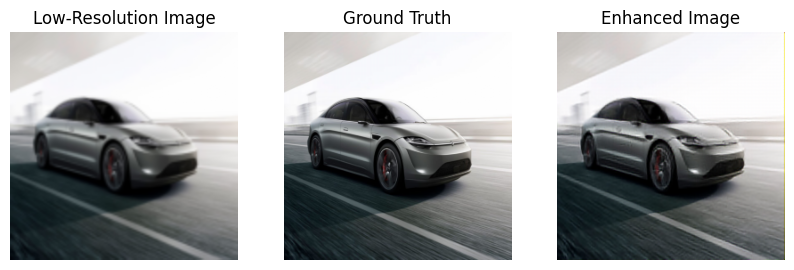

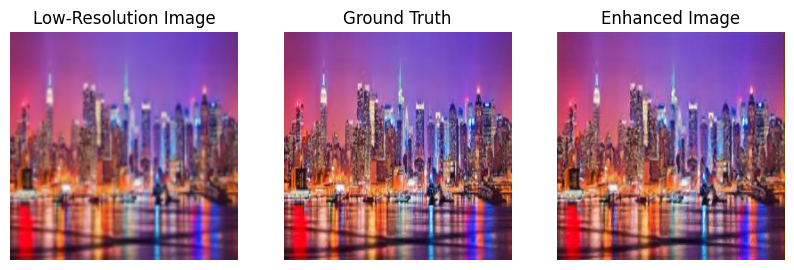

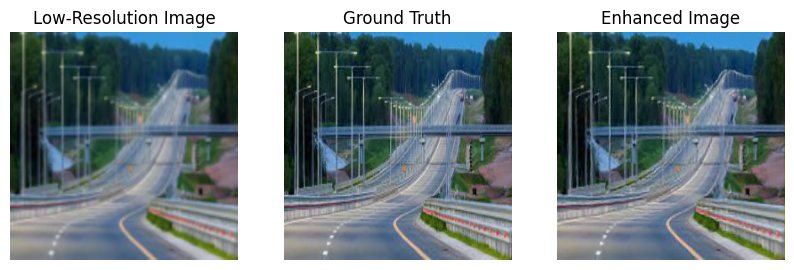

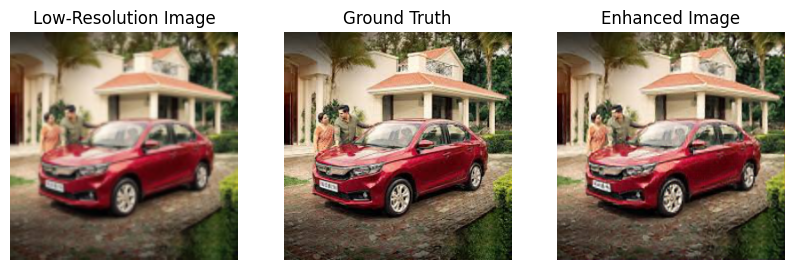

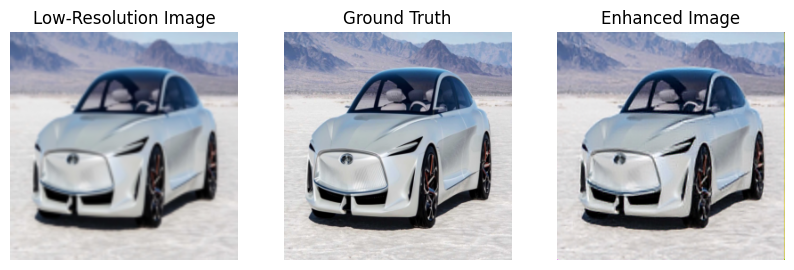

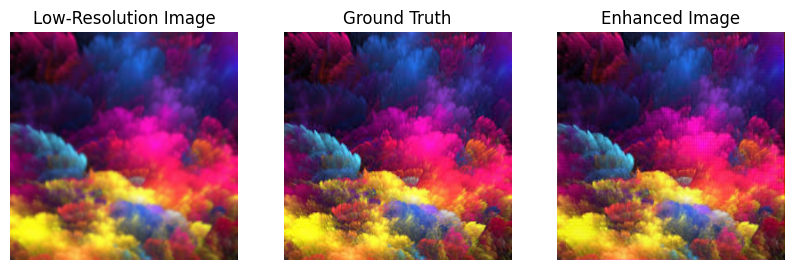

In [21]:
show_images(test_low_images, test_high_images, count=10, size=SIZE)